In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment')
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/hypothetical_genes/'
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/hypothetical_genes/'
tmpdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/tmp/'
matplotlib.__version__

'3.3.3'

rerun on 2021-12-07 after correcting for salinity of media samples

In [2]:
infiles=glob.glob('/mnt/scgc/simon/microg2p/Data/SAGs_WGS/*/*/*/*/Prokka/*.tsv')
# /mnt/scgc/simon/microg2p/Data/SAGs_WGS/locos/*/*/*/Prokka/*.tsv
gene_count=pd.DataFrame(columns=['SAG', '#_genes', '#_hypothetical_genes'])
desired='hypothetical protein'

if os.path.isfile(outdir+'hypothetical_gene_counts_per_SAG.csv')== False:        
    for file in infiles:
        fh=open(file, "r")
        txt=fh.read()
        count=txt.count('hypothetical protein')
        total_genes=len(open(file).readlines())
        SAG=file[-14:]
        SAG=SAG[:10]
        row=[SAG, total_genes, count]
        gene_count.loc[len(gene_count)]=row

    gene_count.to_csv(outdir+'hypothetical_gene_counts_per_SAG.csv')
    gene_count    

In [3]:
gene_count=pd.read_csv(outdir+'hypothetical_gene_counts_per_SAG.csv', index_col=0)
cols=['name', 'GTDB_classification', 'GTDBtk_classification']
SAG_date=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv',
                    index_col=0, usecols=cols)
SAG_date=SAG_date.merge(gene_count, how='left', left_on='name', right_on='SAG')
SAG_date['number_of_cells']=1
SAG_date

,GTDB_classification,GTDBtk_classification,SAG,#_genes,#_hypothetical_genes,number_of_cells
0,Pelagibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AH-135-A01,398.0,121.0,1
1,Hel1-33-131,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,AH-135-A02,1657.0,629.0,1
2,IMCC9063,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AH-135-A03,941.0,257.0,1
3,Thioglobus,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,AH-135-A04,1498.0,344.0,1
4,SCGC-AAA076-P13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,AH-135-A05,408.0,124.0,1
...,...,...,...,...,...,...
5845,MAG-121220-bin8,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,AH-273-P18,1296.0,511.0,1
5846,UBA3537,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,AH-273-P19,1035.0,405.0,1
5847,Pelagibacter_A,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AH-273-P20,1076.0,282.0,1
5848,Pelagibacter,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,AH-273-P22,356.0,103.0,1


In [4]:
gene=SAG_date.groupby(['GTDB_classification'])['#_genes', '#_hypothetical_genes', 'number_of_cells'].sum()

gene['percent_hypothetical_genes']=(gene['#_hypothetical_genes']/gene['#_genes'])*100
#gene=gene.sort_values(by='count')
gene

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,#_genes,#_hypothetical_genes,number_of_cells,percent_hypothetical_genes
GTDB_classification,,,,
2-01-FULL-41-14,611.0,175.0,1,28.641571
AAA164-E04,39103.0,19969.0,37,51.067693
AAA536-G10,47781.0,14152.0,48,29.618468
AG-337-I02,13203.0,3447.0,14,26.107703
AG-339-G14,561.0,134.0,1,23.885918
...,...,...,...,...
Vibrio,3678.0,1011.0,1,27.487765
Vicingaceae,2793.0,1221.0,3,43.716434
Winogradskyella,11186.0,5202.0,9,46.504559


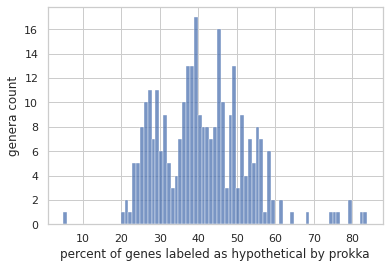

<Figure size 360x360 with 0 Axes>

In [5]:
sns.set_style("whitegrid")
gene_dist=sns.histplot(gene, x='percent_hypothetical_genes', binwidth=1)
plt.ylabel('genera count')
plt.xlabel('percent of genes labeled as hypothetical by prokka')
plt.show()
plt.figure(figsize=(5,5))
fig=gene_dist.get_figure()
fig.savefig(images + 'Percent of genes listed as hypothetical per genus.pdf')


In [6]:
totalRNA=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/RNA_summaries/All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_prokka_anotation_stacked.csv',
                index_col=0)
#df['C'] = df.apply(lambda x: x.A in x.B, axis=1)

totalRNA['hypo']=np.where(totalRNA['prokka_function'] == "hypothetical_protein", "Hypothetical", "Non_hypothetical")

totalRNA

RNApercell=totalRNA.pivot_table(index=['genus', 'date'], aggfunc=np.sum, values='transcripts_per_cell', columns='hypo')
RNApercell=RNApercell.reset_index()
RNApercell['total']=RNApercell['Hypothetical']+RNApercell['Non_hypothetical']
RNApercell['percent_reads_hypothetical']=(RNApercell['Hypothetical']/RNApercell['total'])*100
RNApercell.to_csv(outdir+'RNA_read_distribution_to_hypothetical_genes.csv')
RNApercell

hypo,genus,date,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical
0,AAA164-E04,20171102,549.301307,258.259202,807.560509,68.019833
1,AAA164-E04,20181030,73.651893,49.371437,123.023330,59.868233
2,AAA164-E04,20190402,93.419477,98.188639,191.608116,48.755490
3,AAA164-E04,20190709,120.506514,80.407293,200.913807,59.979210
4,AAA536-G10,20171102,53.411363,214.996417,268.407780,19.899335
...,...,...,...,...,...,...
655,Winogradskyella,20190709,4.911231,19.210599,24.121830,20.360111
656,Yoonia,20171102,15.177845,207.322898,222.500742,6.821480
657,Yoonia,20181030,10.113208,74.072413,84.185621,12.012987
658,Yoonia,20190402,9.442620,35.704154,45.146774,20.915381


In [7]:
RNApercell2=RNApercell.merge(gene, left_on='genus', right_on='GTDB_classification', how='left')
RNApercell2=RNApercell2[RNApercell2['number_of_cells']>=10 ]
RNApercell2=RNApercell2[RNApercell2['genus']!='Unclassified' ]
RNApercell2.head()

,genus,date,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical,#_genes,#_hypothetical_genes,number_of_cells,percent_hypothetical_genes
0,AAA164-E04,20171102,549.301307,258.259202,807.560509,68.019833,39103.0,19969.0,37,51.067693
1,AAA164-E04,20181030,73.651893,49.371437,123.023330,59.868233,39103.0,19969.0,37,51.067693
2,AAA164-E04,20190402,93.419477,98.188639,191.608116,48.755490,39103.0,19969.0,37,51.067693
3,AAA164-E04,20190709,120.506514,80.407293,200.913807,59.979210,39103.0,19969.0,37,51.067693
4,AAA536-G10,20171102,53.411363,214.996417,268.407780,19.899335,47781.0,14152.0,48,29.618468


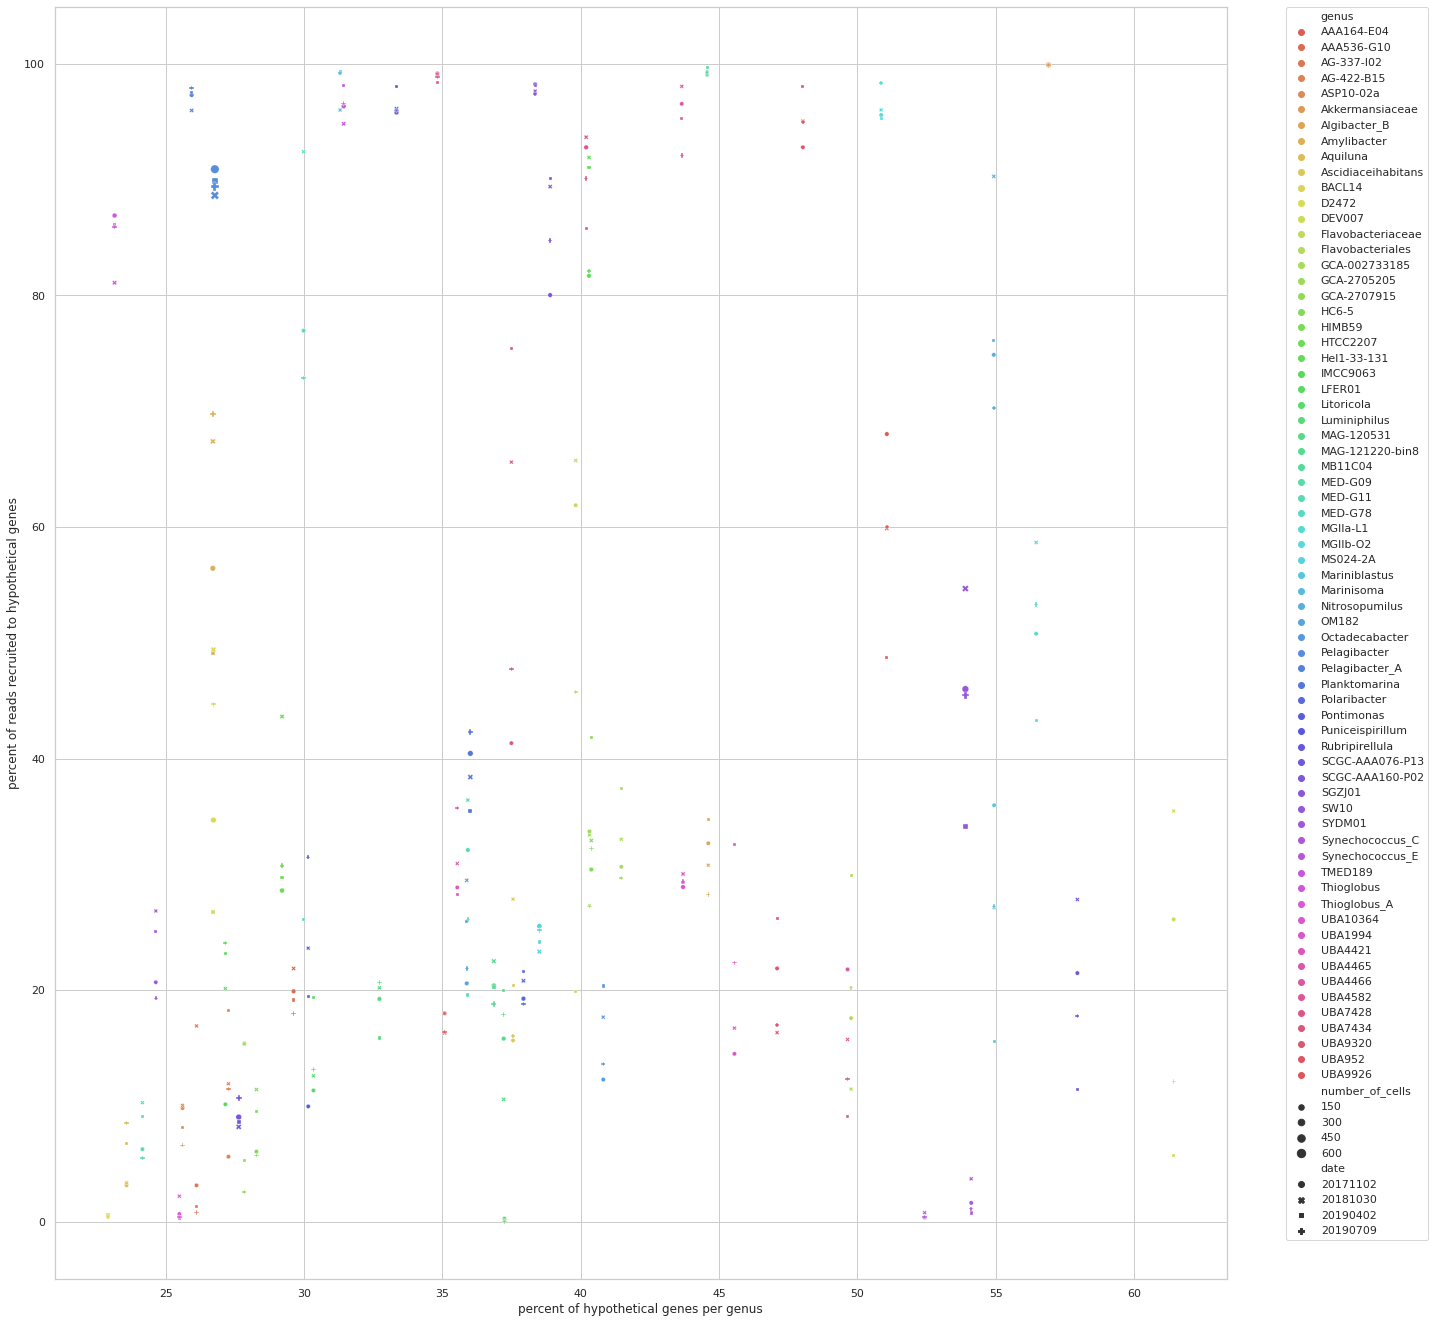

In [8]:
 #make and save scatter plot
plt.figure(figsize=(20,20))
testfig=sns.scatterplot(data=RNApercell2, y='percent_reads_hypothetical', x='percent_hypothetical_genes', 
                        style='date', hue='genus', palette='hls', size='number_of_cells')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.ylabel('percent of reads recruited to hypothetical genes')
plt.xlabel('percent of hypothetical genes per genus')
plt.show()
fig=testfig.get_figure()
fig.savefig(images +"comparsion_of_%hypothetical_genes_vs_%_of_reads_recruited_to_hypothetical_genes.pdf")

The lineages with <30% of all genes are hypothetical but >80% of reads are recruiting to hypothetical genes are really interesting. I should look into figuring out 
1. Which lineages they are and if they are in that region all 4 days
2. How many genes am I recruiting to. Obviously it is <30% but is it one or two (aka a virus) or is it more like 20-30% (aka all the hypothetical genes)
3. If I blast the hypothetical genes what comes up? does blast agree that they are hypothetical


In [9]:
cols=['Domain', 'Phyla', 'Class', 'Order', 'Family', 'Genus', 'GTDB_genus']
genus_stats=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Genus_statistics.csv',
                       index_col=0, usecols=cols)
subset=RNApercell2[RNApercell2['percent_reads_hypothetical'] >=80]
subset=subset[subset['percent_hypothetical_genes'] <=40]
subset=subset.merge(genus_stats, left_on='genus', right_on='GTDB_genus', how='left')
subset.head()

,genus,date,Hypothetical,Non_hypothetical,total,percent_reads_hypothetical,#_genes,#_hypothetical_genes,number_of_cells,percent_hypothetical_genes,Domain,Phyla,Class,Order,Family,Genus
0,MED-G78,20181030,419.325325,34.470946,453.796271,92.403872,7902.0,2369.0,11,29.979752,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86,D2472,MED-G78
1,Marinisoma,20171102,19648.140296,156.304135,19804.444431,99.210762,9805.0,3069.0,15,31.300357,Bacteria,Marinisomatota,Marinisomatia,Marinisomatales,Marinisomataceae,Marinisoma
2,Marinisoma,20171102,19648.140296,156.304135,19804.444431,99.210762,9805.0,3069.0,15,31.300357,Bacteria,Marinisomatota,Marinisomatia,Marinisomatales,Marinisomataceae,Marinisoma
3,Marinisoma,20181030,1151.297303,47.938827,1199.236130,96.002553,9805.0,3069.0,15,31.300357,Bacteria,Marinisomatota,Marinisomatia,Marinisomatales,Marinisomataceae,Marinisoma
4,Marinisoma,20181030,1151.297303,47.938827,1199.236130,96.002553,9805.0,3069.0,15,31.300357,Bacteria,Marinisomatota,Marinisomatia,Marinisomatales,Marinisomataceae,Marinisoma


In [10]:
SAR11_20190709=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/GORG_recruitment/All_190709_GoM_RNA_seq_bbmerge_reads_annotated/Pelagibacter.csv',
                          sep='\t')
SAR11_20190709=SAR11_20190709.sort_values('exclusive')



I need to go into the raw GORG output files in order to try and figure out specifically which SAR11 genes are recruiting most of these genes.